# Testing CoNLL-U datasets

In this file we are testing how much the behaviour of a model changes depending of the preprocessing done to our data, including:

- Removing stopwords
- Removing punctuation
- Removing rows that can be considered useless
- Etc

For all test we will use, for now, the same type of model, same split of values, and same hyperparameters.

In [83]:
import sys
import os
import pandas as pd
import string
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_dir, '..', '..'))
sys.path.append(parent_dir)

from utils import extract_original_text, extract_preprocessed_text, load_conllu_data


In [84]:
output_folder = './../output'

classes_file = 'classes.txt'
preprocessed_file = 'preprocessed_dataset.conllu'

seed = 1234

stop_words = stopwords.words('english')
punctuation = list(string.punctuation)

In [4]:
def run_naive_bayes(X_train, y_train, X_test, y_test):
    #4 Training the Naive Bayes classifier
    param_grid = {'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]}  # Adjust the range as needed
    model = MultinomialNB()
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

    # Fit GridSearchCV on the training data
    grid_search.fit(X_train, y_train.values.ravel())

    # Get the best model from GridSearchCV
    best_model = grid_search.best_estimator_

    #5 Evaluate the model
    y_pred = best_model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    return y_pred, best_model

## Test - 1 

### Full preprocessing:
- Lemmatitation 
- Remmoving of unusable rows
- Removing of stopwords
- Removing of punctuation

In [5]:
vectorizer = TfidfVectorizer()
test_1_folder = '0_full_preprocessing'

# Load classes from file using pandas
class_1_df = pd.read_csv(
    f'{output_folder}/{test_1_folder}/{classes_file}', 
    sep='\t',
    header=None, 
    names=['doc_id', 'constructive'],
    skiprows=1
)

# Load preprocessed data 
conllu_data_1 = extract_preprocessed_text(f'{output_folder}/{test_1_folder}/{preprocessed_file}')


# Vectorize data
X_1 = vectorizer.fit_transform(conllu_data_1)
vocabulary_t1 = vectorizer.vocabulary_
# Extract the classes
y_1 = class_1_df['constructive']

In [6]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2, random_state=seed)

In [7]:
pred_test_1, model_1 = run_naive_bayes(X_train_1, y_train_1, X_test_1, y_test_1)

Accuracy: 0.6868223519599667

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.49      0.59      1114
           1       0.66      0.86      0.75      1284

    accuracy                           0.69      2398
   macro avg       0.71      0.67      0.67      2398
weighted avg       0.70      0.69      0.67      2398



In [8]:
vectorizer = TfidfVectorizer()
test_2_folder = '1_keep_punctuation'

# Load classes from file using pandas
class_2_df = pd.read_csv(
    f'{output_folder}/{test_2_folder}/{classes_file}', 
    sep='\t',
    header=None, 
    names=['doc_id', 'constructive'],
    skiprows=1
)

# Load preprocessed data 
conllu_data_2 = extract_preprocessed_text(f'{output_folder}/{test_2_folder}/{preprocessed_file}')


# Vectorize data
X_2 = vectorizer.fit_transform(conllu_data_2)
vocabulary_t2 = vectorizer.vocabulary_
# Extract the classes
y_2 = class_2_df['constructive']

In [9]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=seed)

In [10]:
pred_test_2, model_2 = run_naive_bayes(X_train_2, y_train_2, X_test_2, y_test_2)

Accuracy: 0.6864053377814846

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.49      0.59      1114
           1       0.66      0.86      0.75      1284

    accuracy                           0.69      2398
   macro avg       0.70      0.67      0.67      2398
weighted avg       0.70      0.69      0.67      2398



In [11]:
vectorizer = TfidfVectorizer()
test_3_folder = '2_keep_stopwords'

# Load classes from file using pandas
class_3_df = pd.read_csv(
    f'{output_folder}/{test_3_folder}/{classes_file}', 
    sep='\t',
    header=None, 
    names=['doc_id', 'constructive'],
    skiprows=1
)

# Load preprocessed data 
conllu_data_3 = extract_preprocessed_text(f'{output_folder}/{test_3_folder}/{preprocessed_file}')


# Vectorize data
X_3 = vectorizer.fit_transform(conllu_data_3)
vocabulary_t3 = vectorizer.vocabulary_
# Extract the classes
y_3 = class_3_df['constructive']

In [12]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.2, random_state=seed)

In [13]:
pred_test_3, model_3 = run_naive_bayes(X_train_3, y_train_3, X_test_3, y_test_3)

Accuracy: 0.6818181818181818

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.46      0.58      1114
           1       0.65      0.87      0.75      1284

    accuracy                           0.68      2398
   macro avg       0.70      0.67      0.66      2398
weighted avg       0.70      0.68      0.67      2398



In [14]:
vectorizer = TfidfVectorizer(max_features=2000)
test_4_folder = '3_keep_punctuation_stopwords'

# Load classes from file using pandas
class_4_df = pd.read_csv(
    f'{output_folder}/{test_4_folder}/{classes_file}', 
    sep='\t',
    header=None, 
    names=['doc_id', 'constructive'],
    skiprows=1
)

# Load preprocessed data 
conllu_data_4 = extract_preprocessed_text(f'{output_folder}/{test_4_folder}/{preprocessed_file}')


# Vectorize data
X_4 = vectorizer.fit_transform(conllu_data_4)
vocabulary_t4 = vectorizer.vocabulary_
# Extract the classes
y_4 = class_4_df['constructive']

In [15]:
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4, y_4, test_size=0.2, random_state=seed)

In [16]:
pred_test_4, model_4 = run_naive_bayes(X_train_4, y_train_4, X_test_4, y_test_4)

Accuracy: 0.682652210175146

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.50      0.59      1114
           1       0.66      0.84      0.74      1284

    accuracy                           0.68      2398
   macro avg       0.70      0.67      0.67      2398
weighted avg       0.69      0.68      0.67      2398



In [17]:
text_1_df = pd.DataFrame(conllu_data_1, columns=['text_1'])
text_2_df = pd.DataFrame(conllu_data_2, columns=['text_2'])
text_3_df = pd.DataFrame(conllu_data_3, columns=['text_3'])
text_4_df = pd.DataFrame(conllu_data_4, columns=['text_4'])

test_df = pd.DataFrame(y_test_1)

# Merge the dataframes by their index
combined_results = pd.concat([text_1_df, text_2_df, text_3_df, text_4_df, test_df], axis=1, join='inner')
combined_results

,text_1,text_2,text_3,text_4,constructive
1,i commend harper hold debate outside left - wi...,i commend harper hold debate outside left - wi...,i commend harper for hold the debate outside o...,i commend harper for hold the debate outside o...,1
2,what joke rachel notley be . this post ndp web...,what joke rachel notley be . this post ndp web...,what a joke rachel notley be . this be what be...,what a joke rachel notley be . this be what be...,1
5,what absurd opinion piece ! identity politics ...,what absurd opinion piece ! identity politics ...,what a absurd opinion piece ! identity politic...,what a absurd opinion piece ! identity politic...,1
6,in usa states senate . i believe ontario get b...,in usa states senate . i believe ontario get b...,in the usa most state have a senate . i believ...,in the usa most state have a senate . i believ...,1
8,"==============================' ben carr , win...","==============================' ben carr , win...","==============================' ben carr , a w...","==============================' ben carr , a w...",1
...,...,...,...,...,...
11973,jeff rubin david suzuki . can anyone name two ...,jeff rubin david suzuki . can anyone name two ...,jeff rubin and david suzuki . can anyone name ...,jeff rubin and david suzuki . can anyone name ...,0
11974,blm illustrate lack credibility repeat vicious...,blm illustrate lack credibility repeat vicious...,blm illustrate their lack of credibility by re...,blm illustrate their lack of credibility by re...,0
11980,"i even finish article , i skim jump see local ...","i even finish article , i skim jump see local ...","i do not even finish the article , i just skim...","i do not even finish the article , i just skim...",0
11981,some we prefer life run vote committee .,some we prefer life run vote committee .,some of we prefer not to have our life run by ...,some of we prefer not to have our life run by ...,0


In [18]:
combined_results['test_1'] = pred_test_1
combined_results['test_2'] = pred_test_2
combined_results['test_3'] = pred_test_3
combined_results['test_4'] = pred_test_4

combined_results.shape # 2398 rows

combined_results.sort_index()

# Save test results
combined_results.to_csv(f'{output_folder}/tests_results.csv', index=False)

In [19]:
# Get the number of rows where all test results are the same
all_equal = combined_results[
    (combined_results['test_1'] == combined_results['test_2']) &
    (combined_results['test_1'] == combined_results['test_3']) & 
    (combined_results['test_1'] == combined_results['test_4'])
]

# Get the number of rows where all test results are not the same
all_different = combined_results[
    (combined_results['test_1'] != combined_results['test_2']) |
    (combined_results['test_1'] != combined_results['test_3']) | 
    (combined_results['test_1'] != combined_results['test_4'])
]

all_correct_test_1 = all_equal[all_equal['constructive'] == all_equal['test_1']]
all_correct_test_2 = all_equal[all_equal['constructive'] == all_equal['test_2']]
all_correct_test_3 = all_equal[all_equal['constructive'] == all_equal['test_3']]
all_correct_test_4 = all_equal[all_equal['constructive'] == all_equal['test_4']]

all_wrong_test_1 = all_equal[all_equal['constructive'] != all_equal['test_1']]
all_wrong_test_2 = all_equal[all_equal['constructive'] != all_equal['test_2']]
all_wrong_test_3 = all_equal[all_equal['constructive'] != all_equal['test_3']]
all_wrong_test_4 = all_equal[all_equal['constructive'] != all_equal['test_4']]

all_wrong = combined_results[
    (combined_results['constructive'] != combined_results['test_2']) &
    (combined_results['constructive'] != combined_results['test_3']) & 
    (combined_results['constructive'] != combined_results['test_4']) &
    (combined_results['constructive'] != combined_results['test_1'])
]

all_correct = combined_results[
    (combined_results['constructive'] == combined_results['test_2']) &
    (combined_results['constructive'] == combined_results['test_3']) & 
    (combined_results['constructive'] == combined_results['test_4']) &
    (combined_results['constructive'] == combined_results['test_1'])
]

In [20]:
def get_most_common_words(data, n=10):
    new_stop_words = stop_words.copy()
    new_stop_words.remove('but')
    new_stop_words.remove('if')
    new_stop_words.remove('until')
    new_stop_words.remove('than')
    new_stop_words.remove("shouldn")
    new_stop_words.remove("shouldn't")

    joined_text = data.str.cat(sep=' ')
    # Remove punctuation
    joined_text = joined_text.translate(str.maketrans('', '', string.punctuation))
    # Remove stopwords
    joined_text = ' '.join([word for word in joined_text.split() if word.lower() not in new_stop_words])
    # Count the frequency of each word
    joined_text = joined_text.split()
    joined_text = pd.Series(joined_text)
    # Remove punctuation 
    joined_text = joined_text.value_counts()

    return  joined_text.head(n)

def plot_most_common_words(constructive_data, non_constructive_data, title_1="Constructive", title_2="Non-Constructive"):
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))

    sns.barplot(x=constructive_data.values, y=constructive_data.index, ax=ax[0])
    ax[0].set_title(title_1)
    ax[0].set_xlabel('Frequency')
    ax[0].set_ylabel('Words')

    sns.barplot(x=non_constructive_data.values, y=non_constructive_data.index, ax=ax[1])
    ax[1].set_title(title_2)
    ax[1].set_xlabel('Frequency')
    ax[1].set_ylabel('Words')

    plt.tight_layout()
    plt.show()

In [21]:
# Get the most frequent words from all correct predictions with label 0 (non-constructive) and 1 (constructive)
non_constructive = all_correct[all_correct['constructive'] == 0]
constructive = all_correct[all_correct['constructive'] == 1]

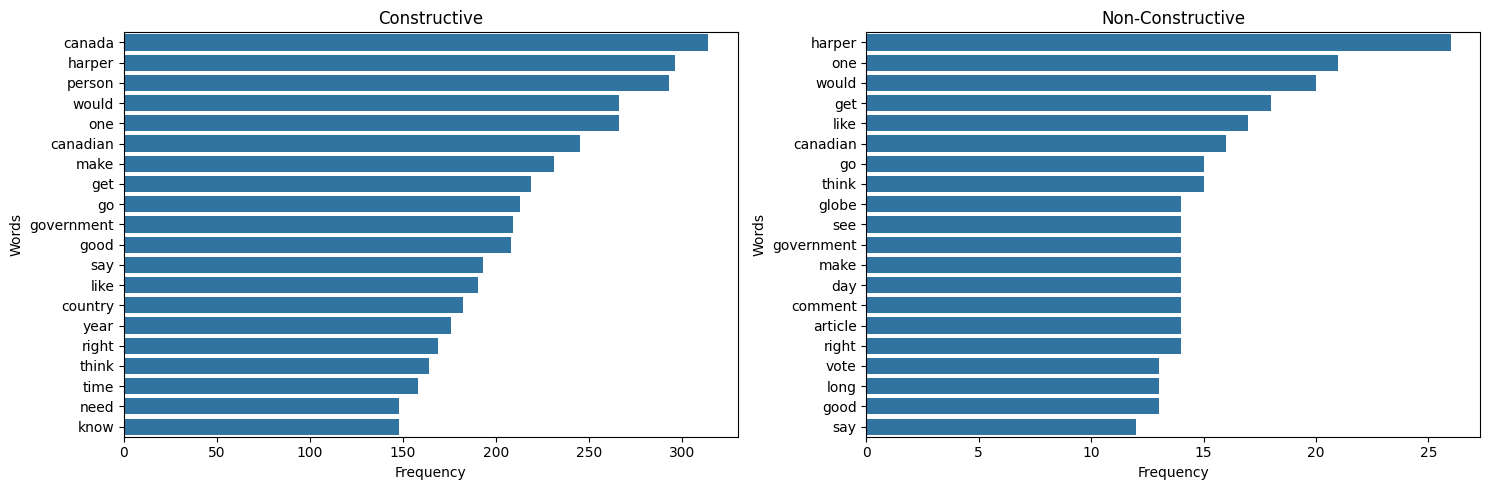

In [22]:
# All correct constructive test 1
all_correct_constructive_t1 = constructive["text_1"]
all_correct_non_constructive_t1 = non_constructive["text_1"]

common_constructive_words_t1 = (get_most_common_words(all_correct_constructive_t1, 20))
common_non_constructive_words_t1 = (get_most_common_words(all_correct_non_constructive_t1, 20))

plot_most_common_words(common_constructive_words_t1, common_non_constructive_words_t1)

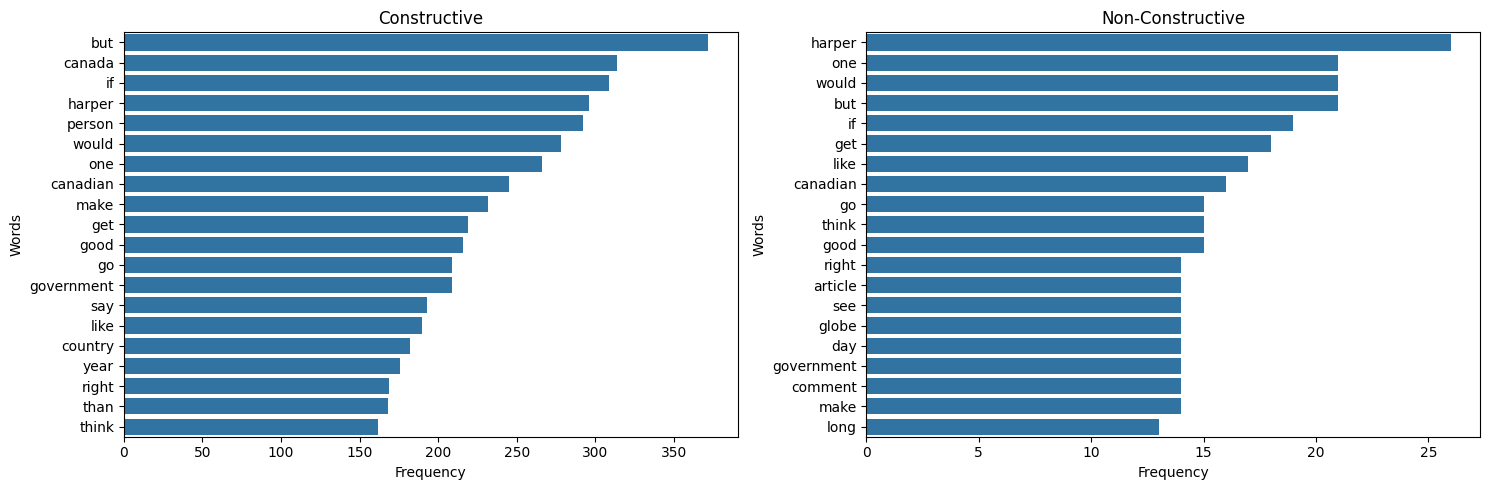

In [23]:
# All correct constructive test 1
all_correct_constructive_t4 = constructive["text_4"]
all_correct_non_constructive_t4 = non_constructive["text_4"]

all_correct_non_constructive_t4.to_csv(f'{output_folder}/all_correct_non_constructive_t4.csv', index=False)

common_constructive_words_t4 = (get_most_common_words(all_correct_constructive_t4, 20))
common_non_constructive_words_t4 = (get_most_common_words(all_correct_non_constructive_t4, 20))

plot_most_common_words(common_constructive_words_t4, common_non_constructive_words_t4)

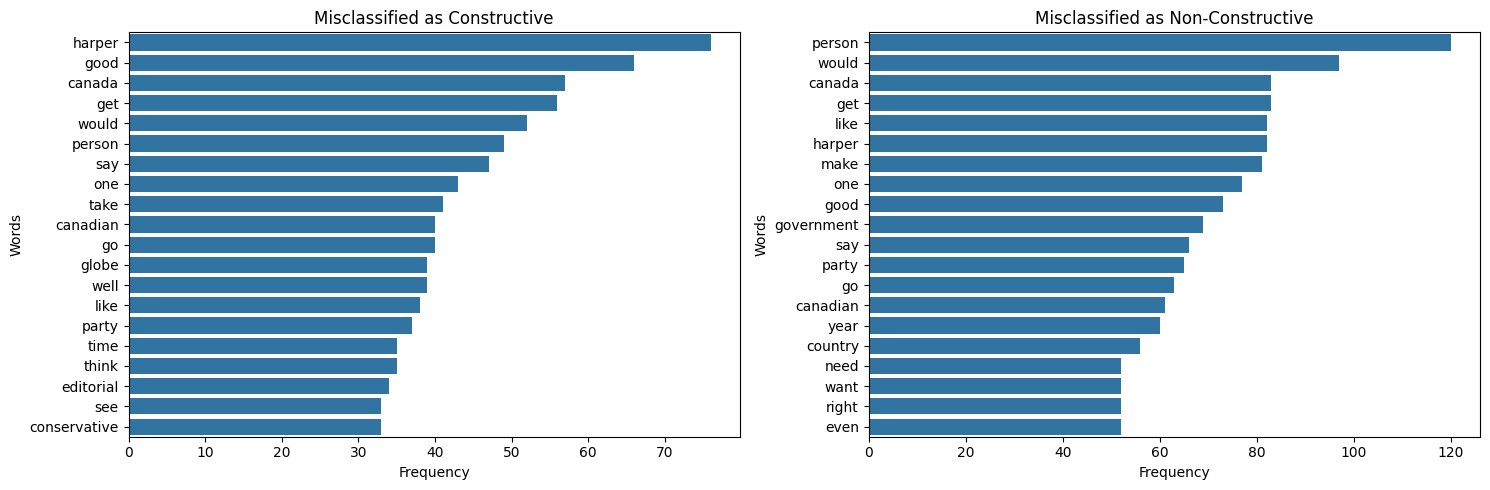

In [24]:
non_constructive_wrong = all_wrong[all_wrong['constructive'] == 0]
constructive_wrong = all_wrong[all_wrong['constructive'] == 1]

fp_constructive_t1 = non_constructive_wrong["text_1"]
fn_non_constructive_t1 = constructive_wrong["text_1"]

fn_non_constructive_t1.to_csv(f'{output_folder}/fn_non_constructive_t1.csv', index=False)

fp_constructive_words_t1 = get_most_common_words(fp_constructive_t1, 20)
fn_non_contructive_words_t1 = get_most_common_words(fn_non_constructive_t1, 20)

plot_most_common_words(fp_constructive_words_t1, fn_non_contructive_words_t1, title_1="Misclassified as Constructive", title_2="Misclassified as Non-Constructive")

In [25]:
# Common words missclassified vs correctly classified
# Actual constructive missclassified as non-constructive
fp_constructive_t1 = non_constructive_wrong["text_1"]

# Non-contstructive correctly classified
all_correct_non_constructive_t1 = non_constructive["text_1"]

# Common words missclassified vs correctly classified
count_words_non_constructive = get_most_common_words(all_correct_non_constructive_t1, all_correct_non_constructive_t1.shape[0])
count_words_missclassified_non_constructive = get_most_common_words(fp_constructive_t1, fp_constructive_t1.shape[0])

df_comparison_non_countructive = pd.DataFrame({
    'word': count_words_non_constructive.index.union(count_words_missclassified_non_constructive.index),
    'count_correctly_classified': count_words_non_constructive.reindex(count_words_non_constructive.index.union(count_words_missclassified_non_constructive.index)),
    'count_missclassified': count_words_missclassified_non_constructive.reindex(count_words_non_constructive.index.union(count_words_missclassified_non_constructive.index))
})

# Set the rank as index
df_comparison_non_countructive['rank'] = df_comparison_non_countructive['count_correctly_classified'].rank(ascending=False, method='first')
df_comparison_non_countructive.set_index('rank', inplace=True)

df_comparison_non_countructive.reset_index()

print(df_comparison_non_countructive.sort_values(by='count_missclassified', ascending=False).head(20))

# Make a df with count_words_non_constructive and count_words_missclassified_non_constructive


# Constructive correctly classified
all_correct_constructive_t1 = constructive["text_1"]
# Actual non-constructive missclassified as constructive
fn_non_constructive_t1 = constructive_wrong["text_1"]


count_words_constructive = get_most_common_words(all_correct_constructive_t1, all_correct_non_constructive_t1.shape[0])

count_words_misclassified_constructive = get_most_common_words(fn_non_constructive_t1, fn_non_constructive_t1.shape[0])


df_comparison_constructive = pd.DataFrame({
    'word': count_words_constructive.index.union(count_words_misclassified_constructive.index),
    'count_correctly_classified': count_words_constructive.reindex(count_words_constructive.index.union(count_words_misclassified_constructive.index)),
    'count_missclassified': count_words_misclassified_constructive.reindex(count_words_constructive.index.union(count_words_misclassified_constructive.index))
})

# Set the rank as index
df_comparison_constructive['rank'] = df_comparison_constructive['count_correctly_classified'].rank(ascending=False, method='first')
df_comparison_constructive.set_index('rank', inplace=True)

df_comparison_constructive.reset_index()

print(df_comparison_constructive.sort_values(by='count_missclassified', ascending=False).head(20))


              word  count_correctly_classified  count_missclassified
rank                                                                
1.0         harper                        26.0                  76.0
17.0          good                        13.0                  66.0
20.0        canada                        12.0                  57.0
4.0            get                        18.0                  56.0
3.0          would                        20.0                  52.0
21.0        person                        12.0                  49.0
22.0           say                        12.0                  47.0
2.0            one                        21.0                  43.0
28.0          take                        10.0                  41.0
6.0       canadian                        16.0                  40.0
7.0             go                        15.0                  40.0
26.0          well                        11.0                  39.0
12.0         globe                

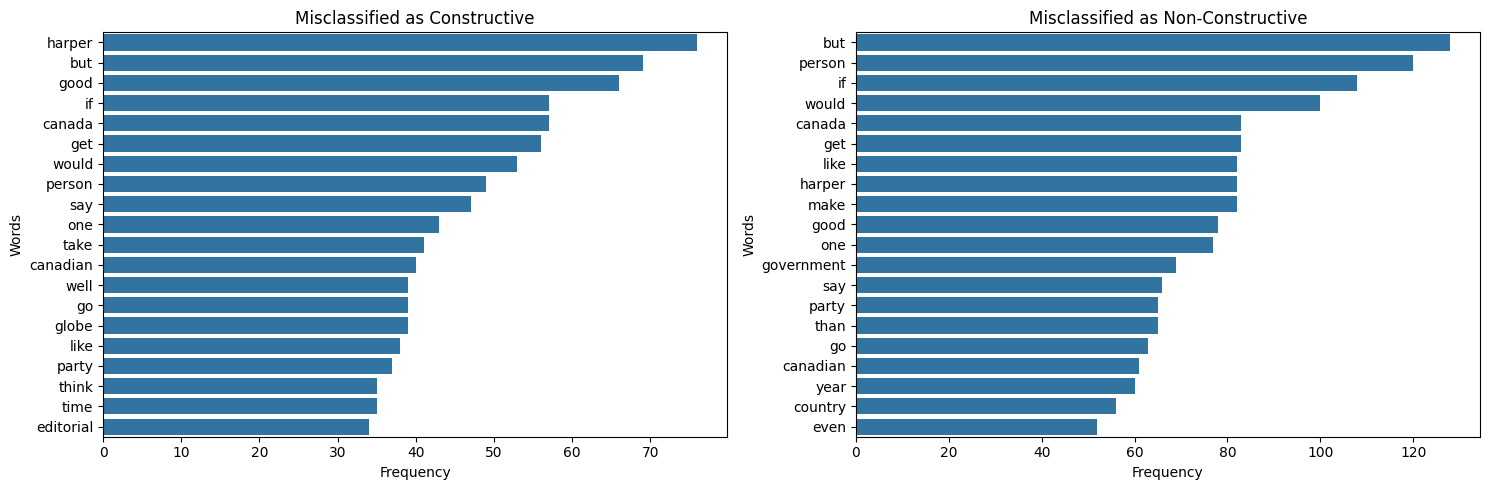

In [26]:
fp_constructive_t4 = non_constructive_wrong["text_4"]
fn_non_constructive_t4 = constructive_wrong["text_4"]

# save fp_constructive_t4 in csv
fn_non_constructive_t4.to_csv(f'{output_folder}/fn_non_constructive_t4.csv', index=False)

fp_constructive_words_t4 = get_most_common_words(fp_constructive_t4, 20)
fn_non_contructive_words_t4 = get_most_common_words(fn_non_constructive_t4, 20)

plot_most_common_words(fp_constructive_words_t4, fn_non_contructive_words_t4, title_1="Misclassified as Constructive", title_2="Misclassified as Non-Constructive")

In [27]:
# Common words missclassified vs correctly classified
# Actual constructive missclassified as non-constructive
fp_constructive_t4 = non_constructive_wrong["text_4"]

# Non-contstructive correctly classified
all_correct_non_constructive_t4 = non_constructive["text_4"]

# Common words missclassified vs correctly classified
count_words_non_constructive_t4 = get_most_common_words(all_correct_non_constructive_t4, all_correct_non_constructive_t4.shape[0])
count_words_missclassified_non_constructive_t4 = get_most_common_words(fp_constructive_t4, fp_constructive_t4.shape[0])

df_comparison_non_countructive_t4 = pd.DataFrame({
    'word': count_words_non_constructive_t4.index.union(count_words_missclassified_non_constructive_t4.index),
    'count_correctly_classified': count_words_non_constructive_t4.reindex(count_words_non_constructive_t4.index.union(count_words_missclassified_non_constructive_t4.index)),
    'count_missclassified': count_words_missclassified_non_constructive_t4.reindex(count_words_non_constructive_t4.index.union(count_words_missclassified_non_constructive_t4.index))
})

# Set the rank as index
df_comparison_non_countructive_t4['rank'] = df_comparison_non_countructive_t4['count_correctly_classified'].rank(ascending=False, method='first')
df_comparison_non_countructive_t4.set_index('rank', inplace=True)

df_comparison_non_countructive_t4.reset_index()

print(df_comparison_non_countructive_t4.sort_values(by='count_missclassified', ascending=False).head(20))

# Constructive correctly classified
all_correct_constructive_t4 = constructive["text_4"]
# Actual non-constructive missclassified as constructive
fn_non_constructive_t4 = constructive_wrong["text_4"]

count_words_constructive_t4 = get_most_common_words(all_correct_constructive_t4, all_correct_non_constructive_t4.shape[0])
count_words_misclassified_constructive_t4 = get_most_common_words(fn_non_constructive_t4, fn_non_constructive_t4.shape[0])

df_comparison_constructive_t4 = pd.DataFrame({
    'word': count_words_constructive_t4.index.union(count_words_misclassified_constructive_t4.index),
    'count_correctly_classified': count_words_constructive_t4.reindex(count_words_constructive_t4.index.union(count_words_misclassified_constructive_t4.index)),
    'count_missclassified': count_words_misclassified_constructive_t4.reindex(count_words_constructive_t4.index.union(count_words_misclassified_constructive_t4.index))
})

# Set the rank as index
df_comparison_constructive_t4['rank'] = df_comparison_constructive_t4['count_correctly_classified'].rank(ascending=False, method='first')
df_comparison_constructive_t4.set_index('rank', inplace=True)

df_comparison_constructive_t4.reset_index()

print(df_comparison_constructive_t4.sort_values(by='count_missclassified', ascending=False).head(20))


           word  count_correctly_classified  count_missclassified
rank                                                             
1.0      harper                        26.0                  76.0
2.0         but                        21.0                  69.0
10.0       good                        15.0                  66.0
5.0          if                        19.0                  57.0
22.0     canada                        12.0                  57.0
6.0         get                        18.0                  56.0
4.0       would                        21.0                  53.0
23.0     person                        12.0                  49.0
24.0        say                        12.0                  47.0
3.0         one                        21.0                  43.0
29.0       take                        10.0                  41.0
8.0    canadian                        16.0                  40.0
9.0          go                        15.0                  39.0
37.0      

Text(0, 0.5, 'Words')

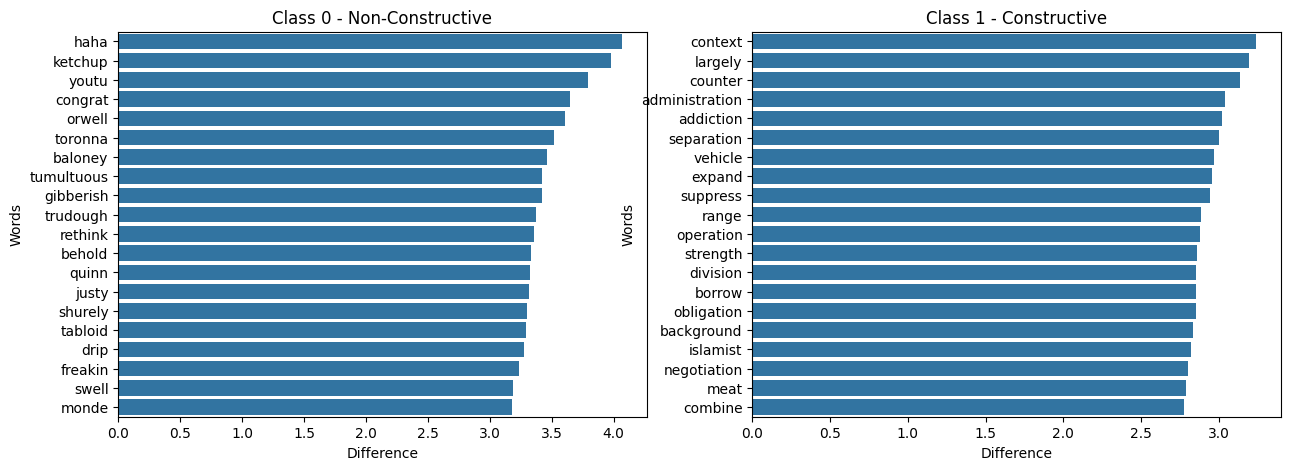

In [28]:
index_to_word_t1 = {index: word for word, index in vocabulary_t1.items()}

weights_words_t1 = pd.DataFrame(
    model_1.feature_log_prob_.T,
    index=[index_to_word_t1[i] for i in range(len(index_to_word_t1))],
    columns=[f"Class_{i}" for i in range(model_1.feature_log_prob_.shape[0])]
)

weights_words_t1

# Most important words for class 0 (non-constructive) with largest difference between classes
weights_words_t1['Difference_0'] = weights_words_t1['Class_0'] - weights_words_t1['Class_1']

# Most important words for class 1 (constructive) with largest difference between classes
weights_words_t1['Difference_1'] = weights_words_t1['Class_1'] - weights_words_t1['Class_0']

words_0 = weights_words_t1.sort_values(by='Difference_0', ascending=False).head(20)

words_1 = weights_words_t1.sort_values(by='Difference_1', ascending=False).head(20)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.barplot(x=words_0['Difference_0'], y=words_0.index, ax=ax[0])
ax[0].set_title('Class 0 - Non-Constructive')
ax[0].set_xlabel('Difference')
ax[0].set_ylabel('Words')

sns.barplot(x=words_1['Difference_1'], y=words_1.index, ax=ax[1])
ax[1].set_title('Class 1 - Constructive')
ax[1].set_xlabel('Difference')
ax[1].set_ylabel('Words')

In [65]:
# Get words with difference_0 > 0 
words_0_vocabulary = weights_words_t1.sort_values(by='Difference_0', ascending=False)
vocabulary_non_constructive = words_0_vocabulary[words_0_vocabulary['Difference_0'] > 2.4]

print(len(vocabulary_non_constructive))


words_1_vocabulary = weights_words_t1.sort_values(by='Difference_1', ascending=False)
vocabulary_constructive = words_1_vocabulary[words_1_vocabulary['Difference_1'] > 1.8]

print(len(vocabulary_constructive))

677
510


In [80]:
# Save indices of vocabulary_non_constructive in csv
vocabulary_non_constructive.index.to_series().reset_index(drop=True).to_csv(f'{output_folder}/vocabulary_non_constructive.csv', index=False, header=False)

# Save indices of vocabulary_constructive in csv
vocabulary_constructive.index.to_series().reset_index(drop=True).to_csv(f'{output_folder}/vocabulary_constructive.csv', index=False, header=False)

Text(0, 0.5, 'Words')

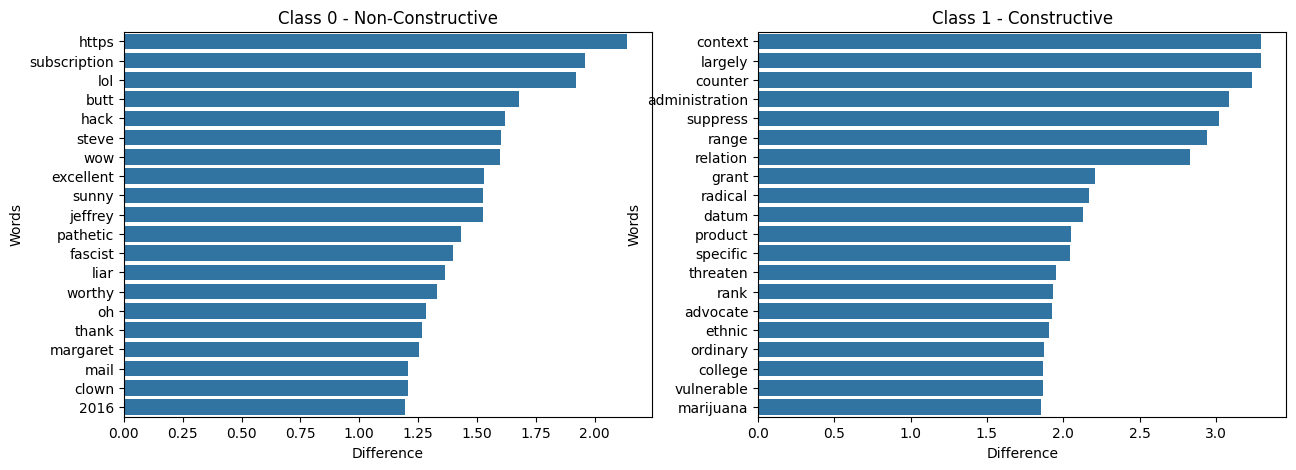

In [29]:
index_to_word_t4 = {index: word for word, index in vocabulary_t4.items()}

weights_words_t4 = pd.DataFrame(
    model_4.feature_log_prob_.T,
    index=[index_to_word_t4[i] for i in range(len(index_to_word_t4))],
    columns=[f"Class_{i}" for i in range(model_4.feature_log_prob_.shape[0])]
)

weights_words_t4

# Most important words for class 0 (non-constructive) with largest difference between classes
weights_words_t4['Difference_0'] = weights_words_t4['Class_0'] - weights_words_t4['Class_1']

# Most important words for class 1 (constructive) with largest difference between classes
weights_words_t4['Difference_1'] = weights_words_t4['Class_1'] - weights_words_t4['Class_0']

words_0_t4 = weights_words_t4.sort_values(by='Difference_0', ascending=False).head(20)

words_1_t4 = weights_words_t4.sort_values(by='Difference_1', ascending=False).head(20)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.barplot(x=words_0_t4['Difference_0'], y=words_0_t4.index, ax=ax[0])
ax[0].set_title('Class 0 - Non-Constructive')
ax[0].set_xlabel('Difference')
ax[0].set_ylabel('Words')

sns.barplot(x=words_1_t4['Difference_1'], y=words_1_t4.index, ax=ax[1])
ax[1].set_title('Class 1 - Constructive')
ax[1].set_xlabel('Difference')
ax[1].set_ylabel('Words')

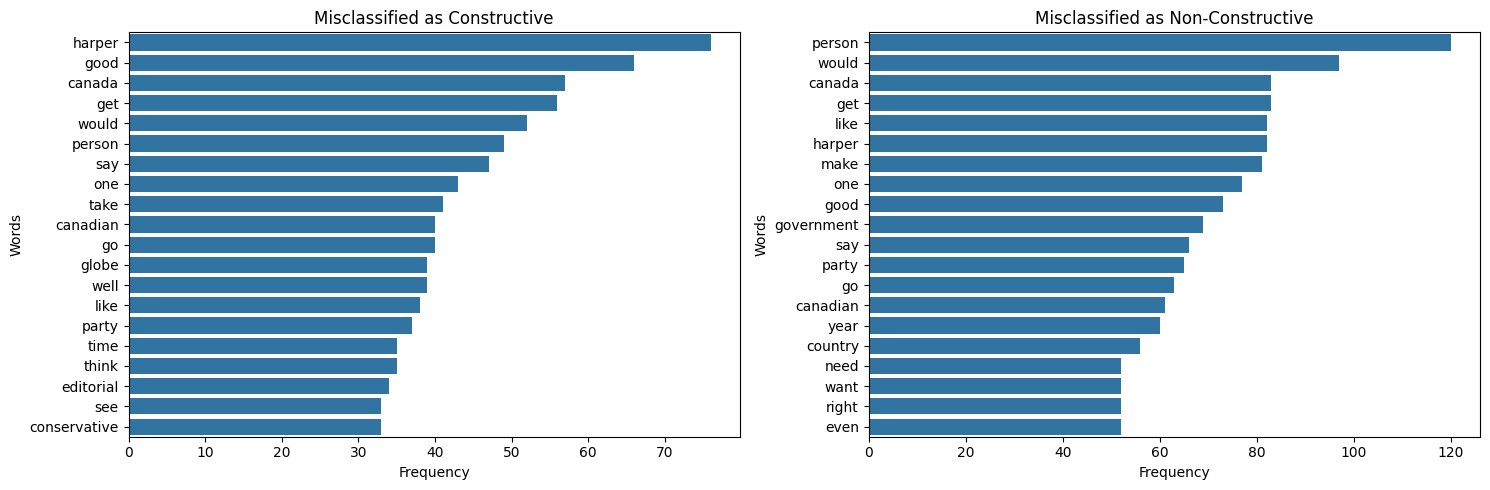

In [30]:
non_constructive_wrong = all_wrong[all_wrong['constructive'] == 0]
constructive_wrong = all_wrong[all_wrong['constructive'] == 1]

fp_constructive_t1 = non_constructive_wrong["text_1"]
fn_non_constructive_t1 = constructive_wrong["text_1"]

fp_constructive_words_t1 = get_most_common_words(fp_constructive_t1, 20)
fn_non_contructive_words_t1 = get_most_common_words(fn_non_constructive_t1, 20)

plot_most_common_words(fp_constructive_words_t1, fn_non_contructive_words_t1, title_1="Misclassified as Constructive", title_2="Misclassified as Non-Constructive")

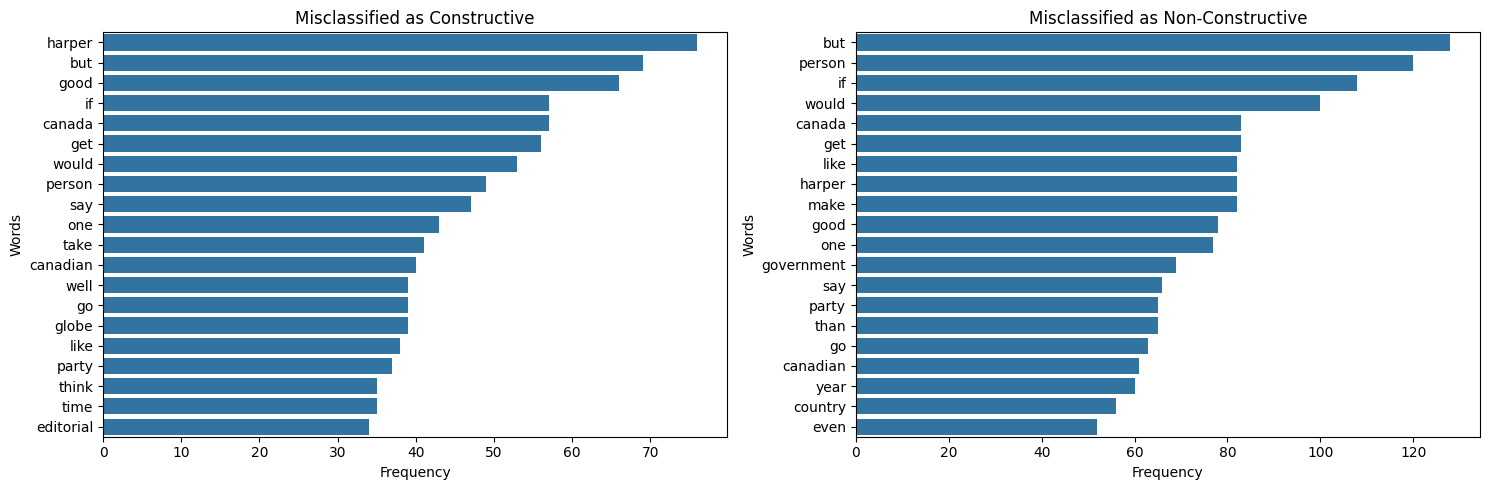

In [31]:
fp_constructive_t4 = non_constructive_wrong["text_4"]
fn_non_constructive_t4 = constructive_wrong["text_4"]

fp_constructive_words_t4 = get_most_common_words(fp_constructive_t4, 20)
fn_non_contructive_words_t4 = get_most_common_words(fn_non_constructive_t4, 20)

plot_most_common_words(fp_constructive_words_t4, fn_non_contructive_words_t4, title_1="Misclassified as Constructive", title_2="Misclassified as Non-Constructive")

## Extract vocabulary

In [88]:
import stanza
pipeline = stanza.Pipeline(lang='en', processors='tokenize,lemma,pos')

/Users/saito/Documents/GitHub/NLP-DetecConstComm-project/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/saito/Documents/GitHub/NLP-DetecConstComm-project/venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-01-04 20:51:45 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES
2025-01-04 20:51:46 INFO: Downloaded file to /Users/saito/stanza_resources/resources.json
2025-01-04 20:51:46 WARNING: Language en package default expects mwt, which has been added
2025-

In [127]:
# Get words with difference_0 > 0 
words_0_vocabulary = weights_words_t1.sort_values(by='Difference_0', ascending=False)
vocabulary_non_constructive = words_0_vocabulary[(words_0_vocabulary['Difference_0'] > 0)]

print(len(vocabulary_non_constructive))


words_1_vocabulary = weights_words_t1.sort_values(by='Difference_1', ascending=False)
vocabulary_constructive = words_1_vocabulary[(words_1_vocabulary['Difference_1'] > 0)]

print(len(vocabulary_constructive))

10169
14290


In [128]:

def get_vocabulary_lemma(data):
    vocabulary = []
    for index in data.index:
        doc = pipeline(data.index.to_series()[index])
        if (doc.sentences[0].words[0].upos != 'X' and doc.sentences[0].words[0].upos != 'PUNCT'):
            vocabulary.append(doc.sentences[0].words[0].lemma)
    return vocabulary

vocabulary_non_constructive_lemma = get_vocabulary_lemma(vocabulary_non_constructive)
vocabulary_constructive_lemma = get_vocabulary_lemma(vocabulary_constructive)

In [125]:
vocabulary_constructive_lemma

['dentist',
 'efficiency',
 'enrich',
 'involve',
 'outlaw',
 'contributor',
 'vacuum',
 'crop',
 'taint',
 'withdrawal',
 'boast',
 'elevate',
 'truthful',
 'policeman',
 'approximately',
 'protester',
 'maximum',
 'objection',
 'militant',
 'obscure',
 'dirt',
 'monthly',
 'college',
 'overweight',
 'reagan',
 'insecurity',
 'consultant',
 'hiring',
 'agriculture',
 'derive',
 'hammer',
 'homicide',
 'significance',
 'differentiate',
 'spill',
 'conscious',
 'constantly',
 'confident',
 'minimize',
 'length',
 'initially',
 'mourn',
 'activism',
 'purely',
 'mac',
 'lament',
 'enlighten',
 'severe',
 'coat',
 'parking',
 'solving',
 'overstate',
 'imperative',
 'paranoia',
 'ethnic',
 'reason',
 'obsessed',
 'product',
 'exceed',
 'outsider',
 'maintenance',
 'messaging',
 'rex',
 'breed',
 'seed',
 'doc',
 'strive',
 'figuratively',
 'judiciary',
 'september',
 'strengthen',
 'cruel',
 '1980s',
 'proposition',
 'dearly',
 'attractive',
 'vulnerable',
 'absorb',
 'baffle',
 'unaware'

In [129]:
# Save elements of vocabulary_non_constructive_lemma in csv
pd.DataFrame(vocabulary_non_constructive_lemma).to_csv(f'{output_folder}/vocabulary_non_constructive.csv', index=False, header=False)

# Save indices of vocabulary_constructive_lemma in csv
pd.DataFrame(vocabulary_constructive_lemma).to_csv(f'{output_folder}/vocabulary_constructive.csv', index=False, header=False)